# Potential Talents

In [260]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [261]:
#loading the data
potential_talent=pd.read_excel('potential-talents.xlsx')
#Copy dataset
pt = potential_talent.copy()
pt.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [262]:
pt.shape

(104, 5)

In [263]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


#### There are no null entries but the column 'fit' is empty.

In [264]:
#Duplicated Rows
pt.loc[pt.duplicated(), :]
print(pt.duplicated().sum())

0


#### There are no duplicate rows, our database therefore contains 104 candidates.

In [265]:
pt.isnull().sum()

id              0
job_title       0
location        0
connection      0
fit           104
dtype: int64

In [266]:
#Counting the number of 'unknown' string in the categorical columns
pt['job_title'].str.contains('unk').sum()

0

In [267]:
pt['location'].str.contains('unk').sum()

0

In [268]:
pt['connection'].str.contains('unk').sum()

0

In [269]:
# Basic stats for categorical columns
pt.describe(include=object)

,job_title,location,connection
count,104,104,104
unique,52,41,33
top,2019 C.T. Bauer College of Business Graduate (...,Kanada,500+
freq,7,12,44


#### There are 52 unique job titles, 41 unique locations and 33 respondents with more than 500 connections.

### Data Exploration

In [270]:
#Unique job titles
pt.job_title.value_counts()

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, C

In [271]:
#Location
pt.location.value_counts()

location
Kanada                                 12
Raleigh-Durham, North Carolina Area     8
Houston, Texas Area                     8
Greater New York City Area              7
Houston, Texas                          7
Denton, Texas                           6
San Francisco Bay Area                  5
Greater Philadelphia Area               5
İzmir, Türkiye                          4
Lake Forest, California                 4
Atlanta, Georgia                        4
Chicago, Illinois                       2
Austin, Texas Area                      2
Greater Atlanta Area                    2
Amerika Birleşik Devletleri             2
Long Beach, California                  1
Milpitas, California                    1
Greater Chicago Area                    1
Torrance, California                    1
Greater Los Angeles Area                1
Bridgewater, Massachusetts              1
Lafayette, Indiana                      1
Kokomo, Indiana Area                    1
Las Vegas, Nevada Area   

In [272]:
#Wordcloud for visualization
from wordcloud import WordCloud
def generate_word_cloud(column):
    job_text = " ".join(item for item in column)
    plt.figure(figsize=(10, 5))
    word_cloud = WordCloud(max_font_size=50, max_words=100, 
                           collocations=False, background_color="#b3cccc",).generate(job_text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

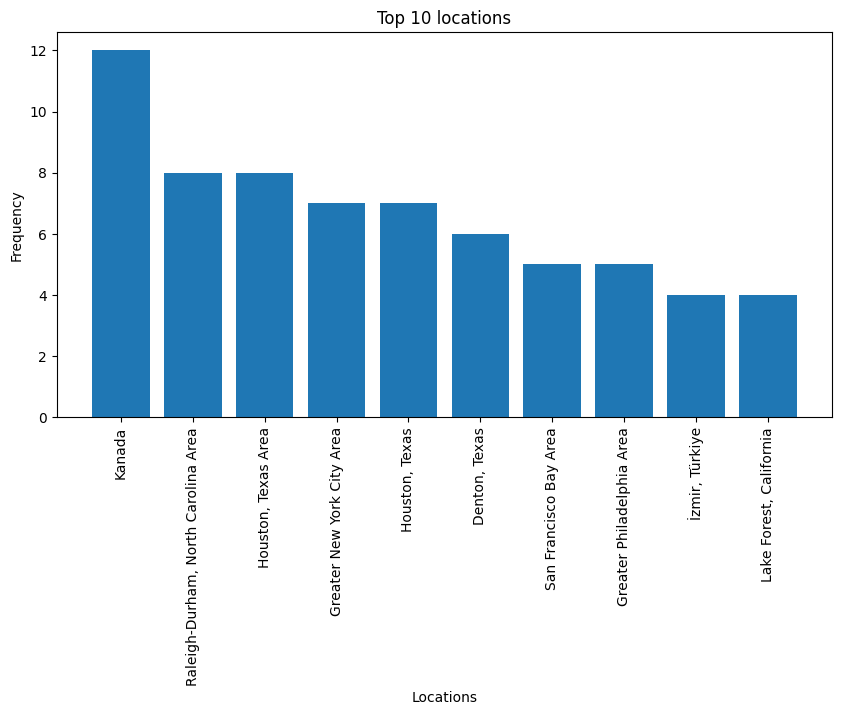

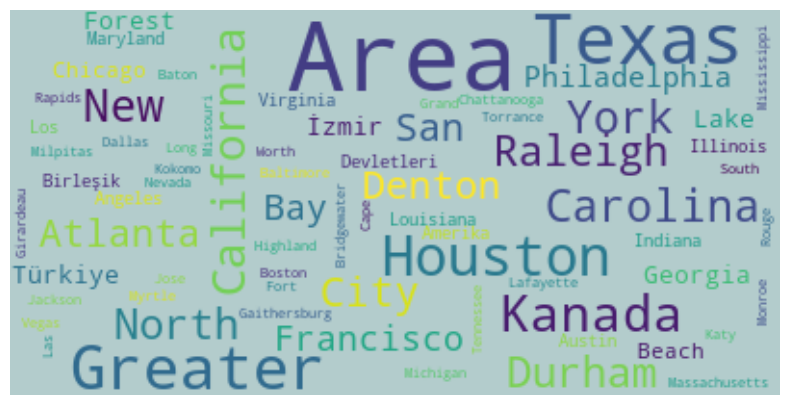

In [273]:
# Top 10 locations
plt.figure(figsize=(10, 5))
plt.bar(pt.location.value_counts().index[: 10], pt.location.value_counts()[: 10])
plt.xticks(rotation=90)
plt.title("Top 10 locations")
plt.xlabel("Locations")
plt.ylabel("Frequency")
plt.show()
    
generate_word_cloud(pt['location'])

#### The top 10 locations are Canada, some cities in the US and Izmir, Turkey.

### Data Cleaning

#### We will now clean the data by removing special characters, prefixes, white spaces, switching to lower case, removing stop words, numbers, performing stemming and lemmatization and correcting spelling errors.

In [274]:
#Preprocessing function
import nltk, re
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer() 
lemmatizer=WordNetLemmatizer()

def clean_string(text, stem="None"):

    final_string = ""
    
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))

    # Remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Make text lower case
    text = text.lower()
        
    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
   
    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    
    #Stemming & Lemmatization (pos='v' means verb)
    if stem == 'Stem':
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    else:
        text_stemmed = [lemmatizer.lemmatize(y,pos='v') for y in text_filtered]

    final_string = ' '.join(text_stemmed)
    
    # Removing whitespace from the start of the string
    final_string = final_string.lstrip()
    
    # Substituting multiple spaces with single space
    final_string = re.sub(r'\s+', ' ', final_string, flags=re.I)
    
    return final_string

pt['job_title']=pt['job_title'].apply(lambda x: clean_string(x))
pt.iloc[0]['job_title']

'bauer college business graduate magna cum laude aspire human resources professional'

In [275]:
#Correcting Spelling Error in the location column

pt['location']=pt['location'].str.replace("Türkiye","Turkey", regex=True)
pt['location']=pt['location'].str.replace("Kanada","Canada", regex=True)
pt['location']=pt['location'].str.replace("Amerika Birleşik Devletleri","United States of America", regex=True)
pt.head()


,id,job_title,location,connection,fit
0,1,bauer college business graduate magna cum laud...,"Houston, Texas",85,NaN
1,2,native english teacher epik english program korea,Canada,500+,NaN
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,people development coordinator ryan,"Denton, Texas",500+,NaN
4,5,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN


In [276]:
# Replace abreviations by there real texts
pt.replace({'job_title' : { 'chro' : 'chief human resources officer', 'svp' : 'senior vice president'
        ,'gphr' : 'global professional in human resources','hris' : 'human resources information system'
        , 'csr' : 'corporate social responsibility', 'sphr' : 'Senior Professional in Human Resources'
        , 'hr' : 'human resources', 'rrp': 'recommended retail price'}}, regex=True, inplace=True)

### We cleaned the data, corrected some spelling errors and replaced abbreviations with real text before tokenization.

In [277]:
#Unique job titles once again
pt.job_title.value_counts()

job_title
bauer college business graduate magna cum laude aspire human resources professional                                                                                                                                               7
aspire human resources professional                                                                                                                                                                                               7
student humber college aspire human resources generalist                                                                                                                                                                          7
people development coordinator ryan                                                                                                                                                                                               6
native english teacher epik english program korea                             

In [278]:
#Recovering top 10 words in job_titles
word_dict = {}

for i in pt['job_title']:
    for word in i.split(" "):
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] = word_dict[word] + 1
            
print("Top 10 frequently used words:")

pd.DataFrame({'Words': word_dict.keys(), 
              'Frequency': word_dict.values()}).sort_values(by=['Frequency'], ascending=False).head(10)

Top 10 frequently used words:


,Words,Frequency
9,resources,81
8,human,81
7,aspire,35
10,professional,24
28,student,16
32,seek,15
30,generalist,14
1,college,14
26,university,12
27,specialist,12


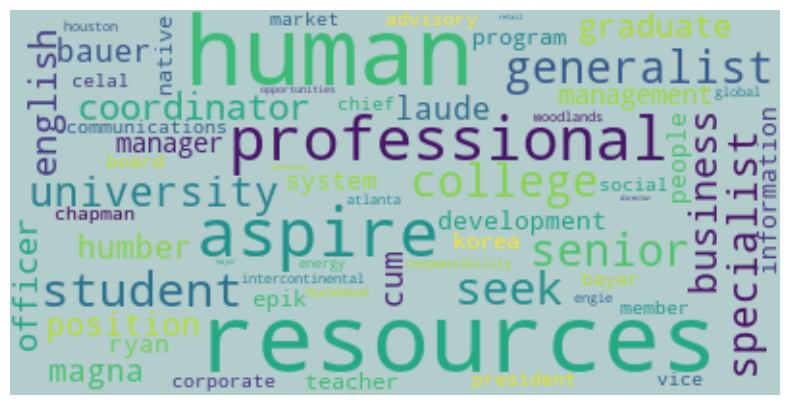

In [279]:
# WordCloud for job titles
generate_word_cloud(pt['job_title'])

#### The most common words in the job_title column are human, resources, aspire and professional.

### Ranking Candidates Based on a Fitness Score (Keywords)

##### Using different word embeddings techniques.

In [280]:
#Applying TF-IDF (Term Frequency-Inverse Document Frequency) to calculate how relevant a word is.
#Cosine similarity gives a useful measure of how similar two documents (job titles in this case) are likely to be, 
#in terms of their subject matter, and independently of the length of the documents.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
ranking_pt=potential_talent.copy()

def rank_candidates_tfidf(keyword,pt,feature_name):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #create an instance of tfidfVectorizer
    tfv = TfidfVectorizer()
    #Add the cleaned keyword to the corpus list 
    corpus.append(keyword)
    #fit the Tfidf vectorizer on the cleaned data
    key_tf=tfv.fit_transform(corpus)
    #create a dataframe that contains tfidf values of each token for each row in the data
    ## Get the feature names using the vocabulary_ attribute
    vocabulary = tfv.vocabulary_
    feature_names = list(vocabulary.keys())
    key_df=pd.DataFrame(key_tf.toarray(), columns=feature_names)
    shape=key_df.shape
    #calculate the cosine similarity between the keyword and the data's rows
    cosine_sim = cosine_similarity(key_tf.toarray()[:shape[0]-1], key_tf.toarray()[shape[0]-1].reshape(1, -1))
    #Add cosine resluts into a new column fit
    pt['fit_tfidf']=cosine_sim
    #store the ranked candidates based on the fit score
    final_pt=pt.sort_values('fit_tfidf',ascending=False)
    #remove the keyword added to reuse the function again on other different keywords
    corpus.pop()
    return final_pt

In [281]:
#Using the keyword given
keyword='aspiring human resources'
ranking_pt=rank_candidates_tfidf(keyword,pt,"job_title")
#No of ranked candidates based on the keyword
print('With TF-IDF, there are',ranking_pt[ranking_pt['fit_tfidf']!=0]
      .shape[0],'ranked candidates for the job',keyword)

With TF-IDF, there are 71 ranked candidates for the job aspiring human resources


In [282]:
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf
16,17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,NaN,0.756236
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236
...,...,...,...,...,...,...
58,59,people development coordinator ryan,"Denton, Texas",500+,NaN,0.000000
62,63,student chapman university,"Lake Forest, California",2,NaN,0.000000
34,35,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN,0.000000
10,11,student chapman university,"Lake Forest, California",2,NaN,0.000000


In [283]:
#Word2Vec
from gensim.models import Word2Vec as w2v
from nltk import word_tokenize
#nltk.download('punkt')
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
word2vec_output_file = "glove"+'.word2vec'
glove2word2vec("glove.6B.100d.txt", word2vec_output_file)

def gettokens_word2vec(keyword,pt,feature_name):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #Append the cleaned keyword to th corpus list 
    corpus.append(keyword)
    #create tokens from our corpus
    corpus_tokens = [word_tokenize(line) for line in corpus]
    #create an instance of word2vec
    w = w2v(corpus_tokens, min_count=2, window=5)# min_count considers sentences with more than 3 words  
    #build vocab from the corpus
    w.build_vocab(corpus_tokens, progress_per=1000)
    #Get top 10 similar words to 'resources'
    print('Top 10 similar words to the word "resources":',w.wv.most_similar('resources', topn=10))
    return corpus_tokens, w

keyword='aspiring human resources'
corpus_tokens, w = gettokens_word2vec(keyword,pt,'job_title')

Top 10 similar words to the word "resources": [('Professional', 0.2505117952823639), ('social', 0.21563605964183807), ('bauer', 0.21276454627513885), ('north', 0.20580117404460907), ('corporate', 0.16575680673122406), ('engie', 0.14038264751434326), ('student', 0.1297401487827301), ('seek', 0.10691073536872864), ('humber', 0.10564550757408142), ('global', 0.09483020007610321)]


In [284]:
#function to join tokens with average of each sentence
def sentence_vector(corpus,w):
    line_vec=np.array(0)
    l=list()
    for i in corpus:
        a=0
        for j in i:
            try:
                a=a+1
                line_vec=line_vec+w.wv[j] 
            except:
                line_vec=line_vec
        l.append(line_vec/a)
    return l

corpus_tokens[:2]


[['bauer',
  'college',
  'business',
  'graduate',
  'magna',
  'cum',
  'laude',
  'aspire',
  'human',
  'resources',
  'professional'],
 ['native', 'english', 'teacher', 'epik', 'english', 'program', 'korea']]

In [285]:
#Main function
def rank_candidates_word2vec(pt):
    # Join tokens with average of each sentence
    all_vec=sentence_vector(corpus_tokens,w)
    # Create a dataframe that contains word2vec vectors
    vec_pt=pd.DataFrame(all_vec)
    shape=vec_pt.shape
    # Explore keys created with their indexes
    w.wv.key_to_index
    # Calculate the cosine similarity between the keyword and the data's rows
    cosine_sim = cosine_similarity(all_vec[:shape[0]-1], all_vec[shape[0]-1].reshape(1, -1))
    # Add cosine resluts into a new column fit
    pt['fit_word2vec']=cosine_sim
    #store the ranked candidates based on the fit score
    final_pt_w2w=pt.sort_values('fit_word2vec',ascending=False)
    # Remove the keyword added to reuse the function again on other different keywords
    corpus_tokens.pop()
    return final_pt_w2w

ranking_pt=rank_candidates_word2vec(ranking_pt)

#No of ranked candidates based on the keyword
print('Using Word2Vec, there are',ranking_pt[ranking_pt['fit_word2vec']!=0]
      .shape[0],'ranked candidates for the job',keyword)

Using Word2Vec, there are 104 ranked candidates for the job aspiring human resources


In [286]:
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf,fit_word2vec
103,104,director administration excellence log,"Katy, Texas",500+,NaN,0.000000,0.999983
34,35,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN,0.000000,0.999966
10,11,student chapman university,"Lake Forest, California",2,NaN,0.000000,0.999966
62,63,student chapman university,"Lake Forest, California",2,NaN,0.000000,0.999952
58,59,people development coordinator ryan,"Denton, Texas",500+,NaN,0.000000,0.999916
...,...,...,...,...,...,...,...
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,NaN,0.756236,0.744291
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.740031
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.688426
16,17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.682524


In [287]:
#Glove: Global Vector. Focuses on words co-occurrences over the whole corpus. 
#Its embeddings relate to the probabilities that two words appear together. 
#function to get tokens and the word2vec model

def gettokens_glove2vec(keyword,pt,feature_name,glove_path):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #Append the cleaned keyword to th corpus list 
    corpus.append(keyword)
    #create tokens from our corpus
    corpus_tokens = [word_tokenize(line) for line in corpus]
    #create an instance of Glove model
    glove2vec_file = glove_path
    model_glove = KeyedVectors.load_word2vec_format(glove2vec_file, binary=False) 
    return corpus_tokens, model_glove

In [288]:
#function to join tokens with average of each sentence
def sentence_vector_glove(corpus,glove):
    line_vec=np.array(0)
    l=list()
    for i in corpus:
        a=0
        for j in i:
            try:
                a=a+1
                line_vec=line_vec+glove.get_vector(j)
            except:
                line_vec=line_vec
        l.append(line_vec/a)
    return l

#final main function
def rank_candidates_glove(pt):
    #join tokens with average of each sentence
    all_vec_glove=sentence_vector_glove(corpus_tokens,glove)
    #create a dataframe that contains word2vec vectors
    vec_pt_glove=pd.DataFrame(all_vec_glove)
    shape=vec_pt_glove.shape
    #calculate the cosine similarity between the keyword and the data's rows
    cosine_simg = cosine_similarity(all_vec_glove[:shape[0]-1], all_vec_glove[shape[0]-1].reshape(1, -1))
    #Add cosine resluts into a new column fit
    pt['fit_glove']=cosine_simg
    #store the ranked candidates based on the fit score
    final_pt_glove=pt.sort_values('fit_glove',ascending=False)
    #remove the keyword added to reuse the function again on other different keywords
    corpus_tokens.pop()
    return final_pt_glove

In [289]:
keyword='aspire human resources'
corpus_tokens, glove = gettokens_glove2vec(keyword,pt,'job_title',"glove.word2vec")

ranking_pt=rank_candidates_glove(ranking_pt)

#No of ranked candidates based on the keyword
print('Using Glove, there are',ranking_pt[ranking_pt['fit_glove']!=0].
      shape[0],'ranked candidates for the job',keyword)

Using Glove, there are 104 ranked candidates for the job aspire human resources


In [290]:
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf,fit_word2vec,fit_glove
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.594646,0.999995
16,17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.682524,0.999991
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.688426,0.999981
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.740031,0.999968
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,NaN,0.756236,0.744291,0.999962
...,...,...,...,...,...,...,...,...
58,59,people development coordinator ryan,"Denton, Texas",500+,NaN,0.000000,0.999916,0.937000
62,63,student chapman university,"Lake Forest, California",2,NaN,0.000000,0.999952,0.935353
10,11,student chapman university,"Lake Forest, California",2,NaN,0.000000,0.999966,0.902601
34,35,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN,0.000000,0.999966,0.847090


In [291]:
#Bert: Bidirectional Encoder Representations from Transformers
#Load the pretrained model 
from sentence_transformers import SentenceTransformer
bert = SentenceTransformer('all-MiniLM-L6-v2')

def rank_candidates_bert(keyword,pt,feature_name):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #Add the cleaned keyword to the corpus list 
    corpus.append(keyword)
    #encode our sentences
    sentence_embeddings = bert.encode(corpus)
    shape=sentence_embeddings.shape
    #calculate the cosine similarity between the keyword and the data's rows
    cosine_sim = cosine_similarity(sentence_embeddings[:shape[0]-1], sentence_embeddings[shape[0]-1].reshape(1, -1))
    #Add cosine resluts into a new column fit
    pt['fit_bert']=cosine_sim
    #store the ranked candidates based on the fit score
    final_pt_bert=pt.sort_values('fit_bert',ascending=False)
    #remove the keyword added to reuse the function again on other different keywords
    corpus.pop()
    return final_pt_bert


In [292]:
keyword='aspire human resources'
ranking_pt=rank_candidates_bert(keyword,ranking_pt,'job_title')

#No of ranked candidates based on the keyword
print('Using Bert, there are',ranking_pt[ranking_pt['fit_bert']!=0].
      shape[0],'ranked candidates for the job',keyword)

Using Bert, there are 104 ranked candidates for the job aspire human resources


In [293]:
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf,fit_word2vec,fit_glove,fit_bert
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.594646,0.999995,0.928787
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.688426,0.999981,0.928787
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.740031,0.999968,0.928787
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,NaN,0.756236,0.744291,0.999962,0.928787
32,33,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN,0.756236,0.796866,0.999929,0.928787
...,...,...,...,...,...,...,...,...,...
44,45,native english teacher epik english program korea,Canada,500+,NaN,0.000000,0.998913,0.986633,0.154695
31,32,native english teacher epik english program korea,Canada,500+,NaN,0.000000,0.998842,0.988095,0.154695
92,93,admissions representative community medical ce...,"Long Beach, California",9,NaN,0.000000,0.996129,0.990997,0.145111
84,85,recommended retail price brand portfolio execu...,Greater Philadelphia Area,500+,NaN,0.000000,0.998561,0.984023,0.108290


#### Based on the results, TF-IDF, Glove and Bert seem to correctly rank the candidates based on the keyword provided. We will use PCA weights to average the scores for the final ranking used in the fit column.

#### Principal component analysis (PCA) is a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends.

In [294]:
#Column fit will be average of NORMALIZED fit_tfidf, word2vec, glove and bert using PCA weights
from sklearn.decomposition import PCA
#Prepare the data to perform PCA
variables=ranking_pt[['fit_tfidf','fit_glove','fit_bert']]
variables

,fit_tfidf,fit_glove,fit_bert
2,0.756236,0.999995,0.928787
20,0.756236,0.999981,0.928787
45,0.756236,0.999968,0.928787
96,0.756236,0.999962,0.928787
32,0.756236,0.999929,0.928787
...,...,...,...
44,0.000000,0.986633,0.154695
31,0.000000,0.988095,0.154695
92,0.000000,0.990997,0.145111
84,0.000000,0.984023,0.108290


In [295]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data=scaler.fit_transform(variables)

In [296]:
#Perform PCA
pca=PCA(n_components=3) #Set the desired number of components
pca.fit(normalized_data)

#Get component loadings and explained variance ratios
transformed_data=pca.transform(normalized_data)
explained_variance_ratios=pca.explained_variance_ratio_

#print("\Transformed Data:")
#print(transformed_data)
print("\nExplained Variance Ratios:")
print(explained_variance_ratios)



Explained Variance Ratios:
[0.7205738 0.2461372 0.033289 ]


#### The first principal component explains 72% of the variance in the data, we will use PC1 for the weights.

In [297]:
#Component Loadings
loadings=pca.components_.T
component_loadings=pd.DataFrame(loadings,columns=['PC1','PC2','PC3'],index=variables.columns)
component_loadings

,PC1,PC2,PC3
fit_tfidf,-0.639613,0.297773,0.708679
fit_glove,-0.428734,-0.903401,-0.007359
fit_bert,-0.638030,0.308542,-0.705492


In [298]:
#To assign weights to each index component, we first normalize the component loadings to sum up to 1 
#for each component, ensuring the weights represent relative contributions. Then, using the first principal 
#component loadings, we get the weights for each index indicator in our dataset.
component_loadings=scaler.fit_transform(component_loadings)
weights=np.abs(component_loadings)/np.sum(np.abs(component_loadings),axis=1,keepdims=True)
weights[:1]

array([[0.27059972, 0.26399146, 0.46540881]])

In [299]:
#Weighted fit average using weights from PCA
fittfidf=scaler.fit_transform(np.array(ranking_pt['fit_tfidf']).reshape(-1,1))
fitglove=scaler.fit_transform(np.array(ranking_pt['fit_glove']).reshape(-1,1))
fitbert=scaler.fit_transform(np.array(ranking_pt['fit_bert']).reshape(-1,1))

n_components=3
tfidf_weight=float(weights[:1,0:1])
glove_weight=float(weights[:1,1:2])
bert_weight=float(weights[:1,2:3])
#Weighted fit average using PC1 weights
ranking_pt['fit']=(fittfidf*tfidf_weight
                   +fitglove*glove_weight
                   +fitbert*bert_weight)/n_components

ranking_pt=ranking_pt.sort_values('fit',ascending=False)
ranking_pt

,id,job_title,location,connection,fit,fit_tfidf,fit_word2vec,fit_glove,fit_bert
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525741,0.756236,0.594646,0.999995,0.928787
16,17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525728,0.756236,0.682524,0.999991,0.928787
20,21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525696,0.756236,0.688426,0.999981,0.928787
45,46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525651,0.756236,0.740031,0.999968,0.928787
96,97,aspire human resources professional,"Kokomo, Indiana Area",71,0.525632,0.756236,0.744291,0.999962,0.928787
...,...,...,...,...,...,...,...,...,...
102,103,always set success,Greater Los Angeles Area,500+,-0.439836,0.000000,0.998400,0.984245,0.032193
15,16,native english teacher epik english program korea,Canada,500+,-0.445434,0.000000,0.999814,0.957633,0.154695
10,11,student chapman university,"Lake Forest, California",2,-0.542393,0.000000,0.999966,0.902601,0.282739
34,35,advisory board member celal bayar university,"İzmir, Turkey",500+,-0.778823,0.000000,0.999966,0.847090,0.208498


##### Our fit column measures the average fit of the different techniques using the weights of the first principal component. We can see that it correctly ranks the candidate based on the keyword.

<Axes: >

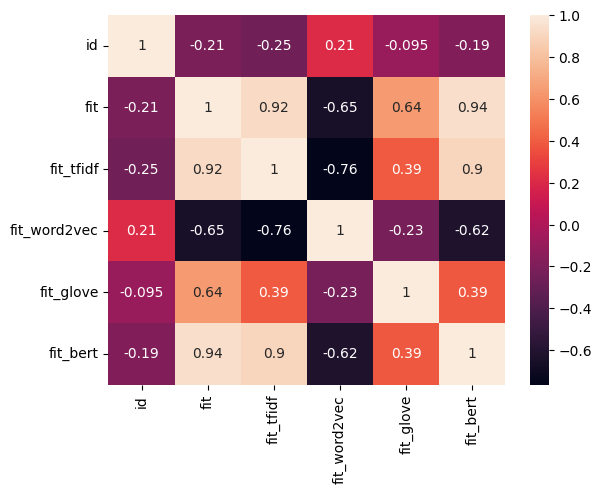

In [300]:
#Correlation between scores
sns.heatmap(ranking_pt.corr(numeric_only=True),annot=True)

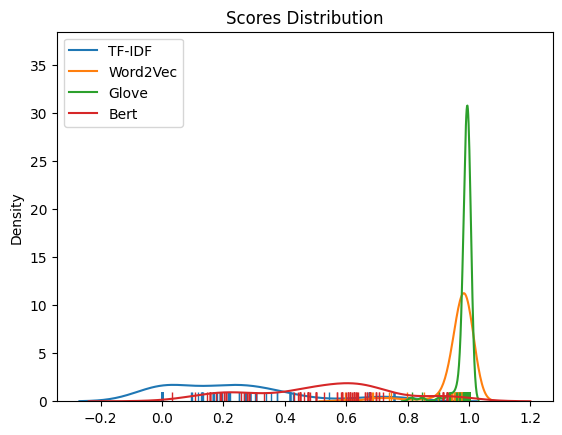

In [301]:
#Distribution of scores
sns.distplot(ranking_pt[['fit_tfidf']], label='TF-IDF',hist=False, rug=True).set(title='Scores Distribution')
sns.distplot(ranking_pt[['fit_word2vec']], label='Word2Vec',hist=False, rug=True)
sns.distplot(ranking_pt[['fit_glove']], label='Glove',hist=False, rug=True)
sns.distplot(ranking_pt[['fit_bert']], label='Bert',hist=False, rug=True)
plt.legend()
plt.show()

#### There is high correlation of 0.9 between the TD-IDF scores and Bert scores and there is relatively high negative correlation (-0.76) between TD-IDF score and Word2Vec scores, therefore we only used TD-IDF, Glove and Bert for the weighted average of the ranking scores.

### Reranking candidates when candidate is starred

#### After starring a candidate by entering its ID, its job title becomes the keyword and then the pointwise technique would be used to re-rank the talent list to select the potential talents.

#### Learning to rank (LTR) is a class of algorithmic techniques that apply supervised machine learning to solve ranking problems in site search relevancy. In other words, it’s what orders query results. Re-rank using the job title starred as keyword and finding its cosine similarity to all the other job titles. For this task, Bert Embeddings vectors will be used.

In [302]:
ranking_pt.set_index('id', inplace=True)

index = ranking_pt.index
print('Candidate IDs list')
for i in index:
    print(i,end=' ')

Candidate IDs list
3 17 21 46 97 33 58 60 24 36 49 6 73 74 52 50 9 25 39 37 7 66 72 79 27 29 100 99 30 28 82 26 61 8 40 10 62 53 78 38 51 88 76 89 101 13 43 56 68 67 71 65 83 15 31 57 14 19 1 44 69 42 81 55 12 64 84 70 75 94 77 47 4 34 22 18 90 41 86 92 48 91 23 5 59 96 80 98 95 102 87 20 93 32 45 54 2 85 63 103 16 11 35 104 

In [303]:
starred_id = input("Please enter ID of starred candidate(s): ")
print("The candidate'(s) starred ID is: " + starred_id)

The candidate'(s) starred ID is: 46


In [304]:
# Build BERT_base model and get Bert vectors
#SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings.
#Embeddings can then be compared e.g. with cosine-similarity to find sentences with a similar meaning.
#This can be useful for semantic textual similarity, semantic search, or paraphrase mining.
from sentence_transformers import SentenceTransformer

bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
rerank_key = ranking_pt[ranking_pt.index.isin([int(starred_id)])]['job_title'].tolist()
# The job title is encoded by calling model.encode()
bert_vectors_rerank = bert_model.encode(list(ranking_pt['job_title']))
rerank_vectors = bert_model.encode(rerank_key)

In [305]:
# Rerank score
rerankscore = []
for i in range(len(bert_vectors_rerank)) :
    re_rank_score = cosine_similarity(np.reshape(bert_vectors_rerank[i],(1,-1)), 
                                      np.reshape(rerank_vectors[0],(1,-1)))
    rerankscore.append(re_rank_score[0][0])

ranking_pt['rerank score'] = rerankscore

In [306]:
ranking_pt.sort_values(by=['rerank score'],ascending=False)
ranking_pt

,job_title,location,connection,fit,fit_tfidf,fit_word2vec,fit_glove,fit_bert,rerank score
id,,,,,,,,,
3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525741,0.756236,0.594646,0.999995,0.928787,1.000000
17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525728,0.756236,0.682524,0.999991,0.928787,1.000000
21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525696,0.756236,0.688426,0.999981,0.928787,1.000000
46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525651,0.756236,0.740031,0.999968,0.928787,1.000000
97,aspire human resources professional,"Kokomo, Indiana Area",71,0.525632,0.756236,0.744291,0.999962,0.928787,1.000000
...,...,...,...,...,...,...,...,...,...
103,always set success,Greater Los Angeles Area,500+,-0.439836,0.000000,0.998400,0.984245,0.032193,0.574448
16,native english teacher epik english program korea,Canada,500+,-0.445434,0.000000,0.999814,0.957633,0.154695,0.413044
11,student chapman university,"Lake Forest, California",2,-0.542393,0.000000,0.999966,0.902601,0.282739,0.454943


#### We can see that ID 46 was correctly reranked with a score of 1. Let's look at the empirical distribution of the scores. We could now rank the scores (after re-ranking) based on the number of connections.

In [307]:
#Converting 500+ to 500 and then converting column to string in order to find percentiles
ranking_pt.connection[ranking_pt.connection == '500+ '] = 500
ranking_pt['connection'].astype(str).astype(int)
from numpy import percentile
quartiles = percentile(ranking_pt['connection'], [25, 50, 75])
quartiles_fit = percentile(ranking_pt['fit'], [25, 50, 75])
# print 5-number summary
print('Min: %.3f' % ranking_pt['connection'].min())
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % ranking_pt['connection'].max())

Min: 1.000
Q1: 47.000
Median: 193.000
Q3: 500.000
Max: 500.000


In [308]:
#Select rows based on minimum of connections & minimum socre
ranking_pt_min_conn=ranking_pt.loc[ranking_pt['connection'] > quartiles[0]]
ranking_pt_min_conn=ranking_pt.loc[ranking_pt['fit'] > quartiles_fit[0]]
ranking_pt_min_conn.shape

(78, 9)

In [309]:
ranking_pt_min_conn.sort_values(by=['rerank score','connection'],ascending=False)

,job_title,location,connection,fit,fit_tfidf,fit_word2vec,fit_glove,fit_bert,rerank score
id,,,,,,,,,
97,aspire human resources professional,"Kokomo, Indiana Area",71,0.525632,0.756236,0.744291,0.999962,0.928787,1.000000
3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525741,0.756236,0.594646,0.999995,0.928787,1.000000
17,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525728,0.756236,0.682524,0.999991,0.928787,1.000000
21,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525696,0.756236,0.688426,0.999981,0.928787,1.000000
46,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,0.525651,0.756236,0.740031,0.999968,0.928787,1.000000
...,...,...,...,...,...,...,...,...,...
56,human resources coordinator intercontinental b...,"Atlanta, Georgia",500,0.049526,0.167137,0.983337,0.992145,0.613546,0.485053
65,human resources coordinator intercontinental b...,"Atlanta, Georgia",500,0.040972,0.167137,0.987303,0.989590,0.613546,0.485053
70,retire army national guard recruiter office ma...,"Virginia Beach, Virginia",82,-0.084828,0.097830,0.992333,0.987342,0.480588,0.457581


#### I filtered out the candidates with a minimum threshold for the number of connections and the fit score using the first quartile. The final dataframe (candidates database) contains 78 candidates. After ranking based on the score, we can rank based on the number of connections and we can also filter the candidates based on their location depending on where the position is located which is a way to filter out candidates who should not be on the list. 

#### The algorithm uses a specific keywork 'aspiring human resources' to rank the candidates. Any ideas that we should explore so that we can even automate this procedure to prevent human bias could be to retrain and update the method periodically, use different keywords and involve different stakeholders in the decision-making process.